In [2]:
import os
import pandas as pd
from rdkit import Chem

# read in the csv file and display the head
file = 'Drugs.csv'
drugs = pd.read_csv(file)
drugs.head()

,Drug Name,SMILES
0,Aspirin,O=C(C1=C(OC(C)=O)C=CC=C1)O
1,Morphine,OC1=C2O[C@@H]3[C@]45C2=C(C=C1)C[C@@H](N(CC5)C)...
2,Apixaban,COC1=CC=C(N2N=C(C3=C2C(N(C4=CC=C(N5CCCCC5=O)C=...
3,Lenalidomide,NC1=CC=CC2=C1CN(C2=O)C3CCC(NC3=O)=O
4,Rivaroxaban,ClC1=CC=C(C(NC[C@H]2CN(C3=CC=C(N4CCOCC4=O)C=C3...


Aspirin structure:


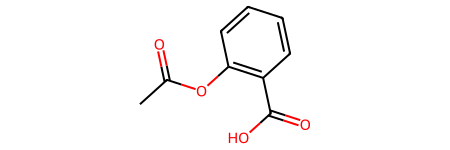

In [3]:
# Use Chem module from rdkit to read the SMILES string and display the structure
aspirin = Chem.MolFromSmiles('O=C(C1=C(OC(C)=O)C=CC=C1)O')
print('Aspirin structure:')
aspirin

In [4]:
# set up directories for image, SMILES and mol files
smi_dir = './smi'
mol_dir = './mol'
sdf_dir = './sdf'
img_dir = './img'

# make the directories if not exist
for d in [smi_dir, mol_dir, sdf_dir, img_dir]:
    if not os.path.exists(d):
        os.makedirs(d)

In [5]:
# initiate an empty list to accept all drug structure
structure_lst = []

# iterate through the whole csv file
for i in range(drugs.shape[0]):
    
    ###################################################
    # get the drug name
    drug = drugs.loc[i, 'Drug Name']
    print(f'\n\033[1m{drug}\033[0m:')

    # get the SMILES string
    smiles = drugs.loc[i, 'SMILES']
    
    # convert SMILES string to structure
    structure = Chem.MolFromSmiles(smiles)
    
    # append the structure to the list
    structure_lst.append(structure)
    
    ###################################################
    # configure the filename and path for .smi files
    smi_file = drug + '.smi'
    smi_path = os.path.join(smi_dir, smi_file)   
    
    ###################################################
    # configure the filename and path for .mol files
    mol_file = drug + '.mol'
    mol_path = os.path.join(mol_dir, mol_file)       
   
    ###################################################
    # configure the filename and path for .sdf files
    sdf_file = drug + '.sdf'
    sdf_path = os.path.join(sdf_dir, sdf_file)           
    
    ###################################################
    # configure the filename and path for .png files
    img_file = drug + '.png'
    img_path = os.path.join(img_dir, img_file)    
    
    
    ###################################################
    # iterate through .smi, .mol and .sdf files
    for item in [smi_path, mol_path, sdf_path]:
        try:            
            w = Chem.SDWriter(item)
            w.write(structure)
            w.close()
            print(f"\t.{item.rsplit('.',1)[1]} file saved")
        except:
            print(f"\t{item.rsplit('.',1)[1]} file failed")
            pass

    # export individual png file
    try:
        Chem.Draw.MolToFile(structure, img_path, size = (200,200), legend = drug) 
        print('\t.png file saved')
    except:
        print('\tImage failed')
        pass

    
###################################################
# configure the filename and path for drug_all.sdf file
sdf_all_file = 'Drugs.sdf'
sdf_all_path = os.path.join(sdf_dir, sdf_all_file)        

try:
    w = Chem.SDWriter(sdf_all_path)
    for structure in structure_lst:
        w.write(structure)
    w.close()    
    print('\nA big sdf file saved for all drugs as "drug_all.sdf".')

except:
    print('\tBig sdf for all drugs failed')
    
    
######################################################################################################    
img_all_path = os.path.join(img_dir, 'drug_all.png')
# export a big png file for all drugs 
try:
    img_all = Chem.Draw.MolsToGridImage(structure_lst, molsPerRow=4, subImgSize=(200,200),legends = drugs['Drug Name'].tolist())    
    img_all.save(img_all_path) 
    print('\nA big image saved for all drugs as "drug_all.png".')
except:
    print('\tBig image for all drugs failed')
    pass


print('\n\x1b[6;30;42m' + 'All DONE!' + '\x1b[0m')


Aspirin:
	.smi file saved
	.mol file saved
	.sdf file saved
	.png file saved

Morphine:
	.smi file saved
	.mol file saved
	.sdf file saved
	.png file saved

Apixaban:
	.smi file saved
	.mol file saved
	.sdf file saved
	.png file saved

Lenalidomide:
	.smi file saved
	.mol file saved
	.sdf file saved
	.png file saved

Rivaroxaban:
	.smi file saved
	.mol file saved
	.sdf file saved
	.png file saved

Ibuprofen:
	.smi file saved
	.mol file saved
	.sdf file saved
	.png file saved

Propranolol:
	.smi file saved
	.mol file saved
	.sdf file saved
	.png file saved

Nicotine:
	.smi file saved
	.mol file saved
	.sdf file saved
	.png file saved

A big sdf file saved for all drugs as "drug_all.sdf".
	Big image for all drugs failed

All DONE!
